In [1]:
#importing libraries
pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [174]:
import sklearn
#import scikit-learn
print('pandas',pd.__version__)
print('numpy',np.__version__)
print('regex',re.__version__)
#print('pickle',scikit-learn.__version__)
print('sklearn',sklearn.__version__)

'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
'''

pandas 1.3.4
numpy 1.21.4
regex 2.2.1
sklearn 1.0.1


'\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport re\nimport pickle\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\n'

In [2]:
#Reading the datasets

train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
#Summery of dataframe

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
sns.set_theme(style='darkgrid')

<AxesSubplot:xlabel='Airline', ylabel='count'>

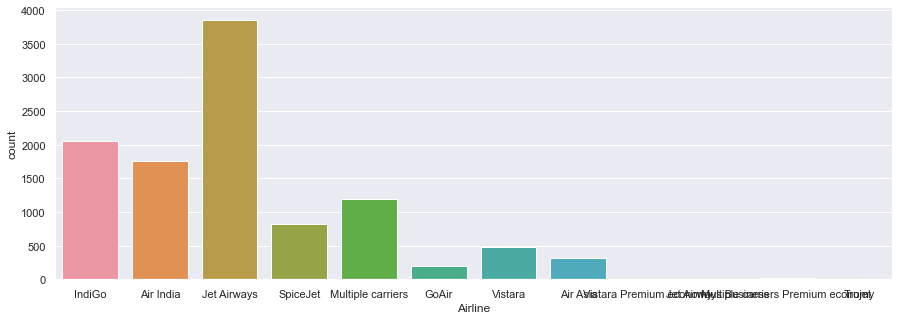

In [6]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='Airline',data=train)

In [7]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## EDA

### Anaylzing categorical features

In [8]:
train[['Airline']].value_counts().reset_index()

,Airline,0
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1752
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


In [9]:
train[['Source']].value_counts().reset_index()

,Source,0
0,Delhi,4537
1,Kolkata,2871
2,Banglore,2197
3,Mumbai,697
4,Chennai,381


In [10]:
train[['Destination']].value_counts().reset_index()

,Destination,0
0,Cochin,4537
1,Banglore,2871
2,Delhi,1265
3,New Delhi,932
4,Hyderabad,697
5,Kolkata,381


In [11]:
## Group by source and destination 

train[['Source','Destination']].value_counts().reset_index()

,Source,Destination,0
0,Delhi,Cochin,4537
1,Kolkata,Banglore,2871
2,Banglore,Delhi,1265
3,Banglore,New Delhi,932
4,Mumbai,Hyderabad,697
5,Chennai,Kolkata,381


In [12]:
### most of the flights are from Delhi to Cochin 
### then on the second place kolkata to Banglore

### In dataset there are only 6 unique combination of source and destination 

In [13]:
train[['Route']].value_counts().reset_index()

,Route,0
0,DEL → BOM → COK,2376
1,BLR → DEL,1552
2,CCU → BOM → BLR,979
3,CCU → BLR,724
4,BOM → HYD,621
...,...,...
123,CCU → IXZ → MAA → BLR,1
124,BOM → JAI → DEL → HYD,1
125,BOM → BBI → HYD,1
126,CCU → RPR → HYD → BLR,1


##### Total 128 unique routs are in the dataset

In [14]:
train[['Additional_Info']].value_counts().reset_index()

,Additional_Info,0
0,No info,8345
1,In-flight meal not included,1982
2,No check-in baggage included,320
3,1 Long layover,19
4,Change airports,7
5,Business class,4
6,No Info,3
7,1 Short layover,1
8,2 Long layover,1
9,Red-eye flight,1


#### No info is came twice due to different case we will correct that later

### Analyzing other features

In [15]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


<AxesSubplot:xlabel='Price', ylabel='Count'>

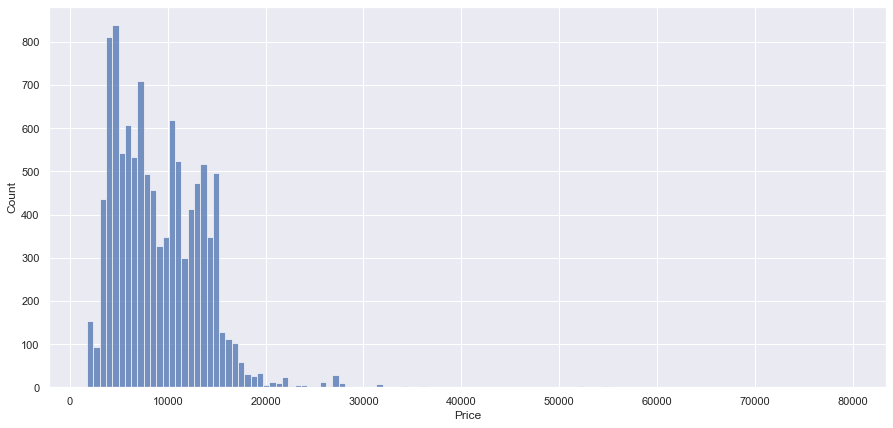

In [16]:
fig = plt.figure(figsize=(15,7))
sns.histplot(train.Price)

C:\Users\PawanK.DESKTOP-6J7APG0.000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

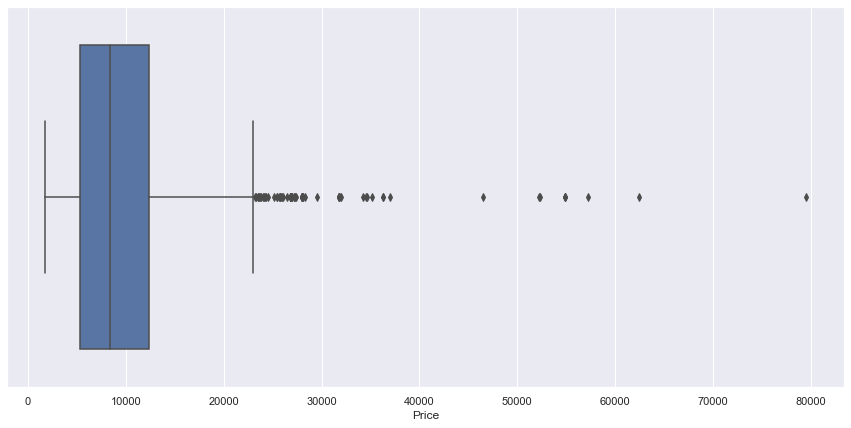

In [17]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(train.Price)

In [18]:
##cheking the outliers

train[(train.Price>40000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [19]:
#### prices are hight because of Business class

In [20]:
train[(train.Price>30000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
1629,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → NAG → DEL,08:50,10:35 02 Mar,25h 45m,2 stops,No info,31783
2099,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,19:10,5h 5m,1 stop,No info,36235
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2693,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 02 Mar,6h 5m,1 stop,No info,35185
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
3700,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,09:30 02 Mar,10h 40m,1 stop,1 Long layover,31825
5013,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,10:25 02 Mar,11h 35m,1 stop,1 Long layover,31825


### Data pre-processing and cleaning 

In [21]:
#creating function to change the duration to int format 

def clearDuration(text):
    text = re.sub('\s','',text)
    text = re.sub('h','.',text)
    text = re.sub('m','',text)
    if re.findall('.$',text) ==['.']:
        text = re.sub('\.','.00',text)
    return text
    

In [22]:
train['Duration'] = train['Duration'].apply(clearDuration)

In [23]:
#changing datatype of Duration to float

train = train.astype({'Duration':float})

In [24]:
categorical_variable = ['Airline','Source', 'Destination', 'Route','Total_Stops','Additional_Info',]

In [25]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [26]:
#function to do the label encoding of categorical variables

train = pd.get_dummies(train,columns=['Airline','Source', 'Destination','Additional_Info'])

In [27]:
train

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2.50,non-stop,3897,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7.25,2 stops,7662,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,13882,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5.25,1 stop,6218,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4.45,1 stop,13302,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2.30,non-stop,4107,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,27/04/2019,CCU → BLR,20:45,23:20,2.35,non-stop,4145,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10680,27/04/2019,BLR → DEL,08:20,11:20,3.00,non-stop,7229,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,01/03/2019,BLR → DEL,11:30,14:10,2.40,non-stop,12648,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
train.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2.50,non-stop,3897,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7.25,2 stops,7662,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,13882,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5.25,1 stop,6218,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4.45,1 stop,13302,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
dic={
'1 stop'     :    int(1),
'non-stop'    :   int(1),
'2 stops'    :    int(1),
'3 stops'    :      int(1),
'4 stops '   :       int(1)
}

In [31]:
train['Total_Stops'] = train['Total_Stops'].map(dic)

In [35]:
train['Total_Stops'] = train['Total_Stops'].fillna(0)

In [36]:
train =train.astype({'Total_Stops':int})

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date_of_Journey                               10683 non-null  object 
 1   Route                                         10682 non-null  object 
 2   Dep_Time                                      10683 non-null  object 
 3   Arrival_Time                                  10683 non-null  object 
 4   Duration                                      10683 non-null  float64
 5   Total_Stops                                   10683 non-null  int32  
 6   Price                                         10683 non-null  int64  
 7   Airline_Air Asia                              10683 non-null  uint8  
 8   Airline_Air India                             10683 non-null  uint8  
 9   Airline_GoAir                                 10683 non-null 

In [38]:
## droping arrival time as dep_time + duration gives the arrival time

train = train.drop(columns = ['Arrival_Time'],axis=1)

In [39]:
#changing the datatype of date of journy to date and time

train['Date_of_Journey']= pd.to_datetime(train['Date_of_Journey'])

In [40]:
def cleanDeptime(text):
    text = re.sub(':','.',text)
    return text

In [41]:
train['Dep_Time'] = train['Dep_Time'].apply(cleanDeptime)

In [42]:
train.head()

,Date_of_Journey,Route,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2019-03-24,BLR → DEL,22.20,2.50,1,3897,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-05,CCU → IXR → BBI → BLR,05.50,7.25,1,7662,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-09-06,DEL → LKO → BOM → COK,09.25,19.00,1,13882,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-12-05,CCU → NAG → BLR,18.05,5.25,1,6218,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2019-01-03,BLR → NAG → DEL,16.50,4.45,1,13302,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
#extracting year,month and day from date of journey columns
#year
train['Year']= [i.year for i in train['Date_of_Journey']]
#Months
train['Month']= [i.month for i in train['Date_of_Journey']]
#Days
train['Day']= [i.day for i in train['Date_of_Journey']]

In [44]:
## droping date of journey columns

train = train.drop(columns = ['Date_of_Journey'],axis=1)

In [45]:
train

,Route,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Year,Month,Day
0,BLR → DEL,22.20,2.50,1,3897,0,0,0,1,0,...,0,0,0,0,0,1,0,2019,3,24
1,CCU → IXR → BBI → BLR,05.50,7.25,1,7662,0,1,0,0,0,...,0,0,0,0,0,1,0,2019,1,5
2,DEL → LKO → BOM → COK,09.25,19.00,1,13882,0,0,0,0,1,...,0,0,0,0,0,1,0,2019,9,6
3,CCU → NAG → BLR,18.05,5.25,1,6218,0,0,0,1,0,...,0,0,0,0,0,1,0,2019,12,5
4,BLR → NAG → DEL,16.50,4.45,1,13302,0,0,0,1,0,...,0,0,0,0,0,1,0,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19.55,2.30,1,4107,1,0,0,0,0,...,0,0,0,0,0,1,0,2019,9,4
10679,CCU → BLR,20.45,2.35,1,4145,0,1,0,0,0,...,0,0,0,0,0,1,0,2019,4,27
10680,BLR → DEL,08.20,3.00,1,7229,0,0,0,0,1,...,0,0,0,0,0,1,0,2019,4,27
10681,BLR → DEL,11.30,2.40,1,12648,0,0,0,0,0,...,0,0,0,0,0,1,0,2019,1,3


In [46]:
## droping year column as all data is of 2019
train = train.drop(columns = ['Year'],axis=1)

In [34]:
train.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2.50,1.0,3897,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7.25,1.0,7662,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,1.0,13882,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5.25,1.0,6218,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4.45,1.0,13302,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
train = train.drop(columns = ['Route'],axis=1)

In [48]:
train.columns

Index(['Dep_Time', 'Duration', 'Total_Stops', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No i

In [49]:
train = train[['Dep_Time', 'Duration', 'Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight', 'Month',
       'Day', 'Price']]

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Dep_Time                                      10683 non-null  object 
 1   Duration                                      10683 non-null  float64
 2   Total_Stops                                   10683 non-null  int32  
 3   Airline_Air Asia                              10683 non-null  uint8  
 4   Airline_Air India                             10683 non-null  uint8  
 5   Airline_GoAir                                 10683 non-null  uint8  
 6   Airline_IndiGo                                10683 non-null  uint8  
 7   Airline_Jet Airways                           10683 non-null  uint8  
 8   Airline_Jet Airways Business                  10683 non-null  uint8  
 9   Airline_Multiple carriers                     10683 non-null 

In [74]:
train = train.astype({'Duration':float})
train = train.astype({'Dep_Time':float})

In [75]:
## creating x and y variables


x= train.iloc[:,:-1]
y = train.iloc[:,-1:]

In [76]:
## train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Model creation 

In [154]:
regressor = RandomForestRegressor(n_estimators = 150,random_state=42)

In [155]:
regressor.fit(x_train,y_train['Price'])

RandomForestRegressor(n_estimators=150, random_state=42)

In [102]:
y_pred = regressor.predict(x_test)

In [103]:
y_pred

array([ 9932.56823214,  6418.52      , 14230.7119697 , ...,
        6381.745     ,  3107.875     ,  9584.5662096 ])

In [104]:
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test,y_pred)))

Mean Squared Error: 2889574.418318886
Mean Absolute Error:887.4297941620666


In [105]:
a = list(y_test['Price'].values)

In [106]:
result = pd.DataFrame(list(zip(a,y_pred)),columns = ['y_test','y_pred'])

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

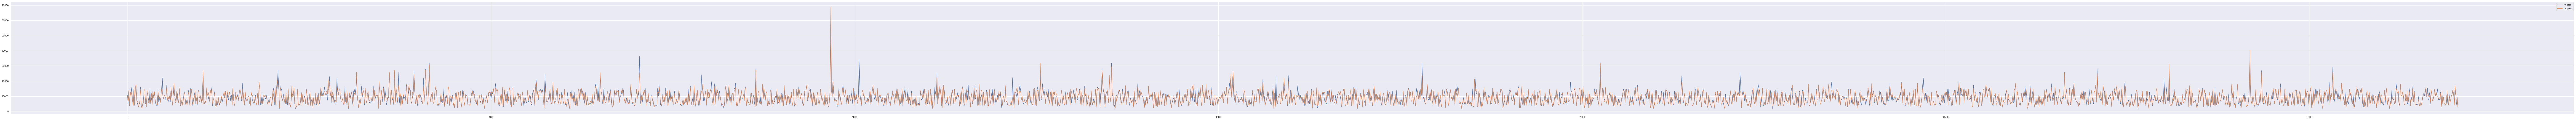

In [107]:
fig = plt.figure(figsize= (20,5))
result.plot(y = ['y_test','y_pred'],figsize=(200, 9))


In [156]:
regressor.score(x_test,y_test)

0.8579273746636181

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Dep_Time                                      10683 non-null  float64
 1   Duration                                      10683 non-null  float64
 2   Total_Stops                                   10683 non-null  int32  
 3   Airline_Air Asia                              10683 non-null  uint8  
 4   Airline_Air India                             10683 non-null  uint8  
 5   Airline_GoAir                                 10683 non-null  uint8  
 6   Airline_IndiGo                                10683 non-null  uint8  
 7   Airline_Jet Airways                           10683 non-null  uint8  
 8   Airline_Jet Airways Business                  10683 non-null  uint8  
 9   Airline_Multiple carriers                     10683 non-null 

In [76]:
#data preprocessing funciton for test data
def preprocessing_testdata(data):
    def clearDuration(text):
        text = re.sub('\s','',text)
        text = re.sub('h','.',text)
        text = re.sub('m','',text)
        if re.findall('.$',text) ==['.']:
            text = re.sub('\.','.00',text)
        return text

    data['Duration'] = data['Duration'].apply(clearDuration)


    #changing datatype of Duration to float

    data = data.astype({'Duration':float})


    #function to do the label encoding of categorical variables
    
    data = data.drop(columns = ['Route'],axis=1)
    categorical_variable = ['Airline','Source', 'Destination','Total_Stops','Additional_Info',]
    
    le = preprocessing.LabelEncoder()
    
    def label_encoder(arr):
        for i in data[categorical_variable]:
            le.fit(data[i])
            arr[i]=le.transform(arr[i])
        return arr


    label_encoder(data)


    ## droping arrival time as dep_time + duration gives the arrival time

    data = data.drop(columns = ['Arrival_Time'],axis=1)

    def cleanDeptime(text):
        text = re.sub(':','.',text)
        return text

    data['Dep_Time'] = data['Dep_Time'].apply(cleanDeptime)


    #extracting month and day from date of journey columns
    data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])
    
    #Months
    data['Month']= [i.month for i in data['Date_of_Journey']]
    #Days
    data['Day']= [i.day for i in data['Date_of_Journey']]



    ## droping date of journey columns

    data = data.drop(columns = ['Date_of_Journey'],axis=1)

    
    ## scaling of numarical variables  
    ss = StandardScaler()
    ss.fit(data[['Dep_Time', 'Duration']])
    xx =ss.transform(data[['Dep_Time', 'Duration']])
    
    deptime = []
    for i in xx:
        deptime.append(i[0])
        
    duration = []
    for i in xx:
        duration.append(i[1])
        
    data['Dep_Time'] = deptime
    data['Duration'] = duration
  
    return data

In [77]:
test_preprocessed = preprocessing_testdata(test)

In [85]:
test_preprocessed.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Month,Day
0,4,2,1,0.782716,0.006066,0,5,6,6
1,3,3,0,-1.170745,-0.775438,0,5,12,5
2,4,2,1,1.108293,1.545211,0,3,5,21
3,6,2,1,-0.853968,0.298384,0,5,5,21
4,0,0,2,1.882638,-0.954408,4,5,6,24


In [86]:
prediction = regressor.predict(test_preprocessed)

In [87]:
prediction[1]

7690.642857142857

In [88]:
test['Predicted_price'] = prediction

In [89]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted_price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10.55,1 stop,No info,8704.300000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.00,1 stop,No info,7690.642857


In [161]:
## saving the model to reuse it later

#opeing the file

file = open('fair_model.pkl','wb')

# dump information to that file

pickle.dump(regressor,file)

In [ ]:
train = preprocessing_testdata(train)